In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
df[df.isnull()].value_counts()

Series([], dtype: int64)

In [5]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
df["car_ID"].value_counts() # same as index not valuable to model

1      1
142    1
132    1
133    1
134    1
      ..
72     1
73     1
74     1
75     1
205    1
Name: car_ID, Length: 205, dtype: int64

In [7]:
df = df.drop("car_ID", axis=1)

C:\Users\MMucahitNAS\AppData\Local\Temp\ipykernel_16248\3151712206.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, linewidths=1, linecolor="green", fmt=".1f")


<Axes: >

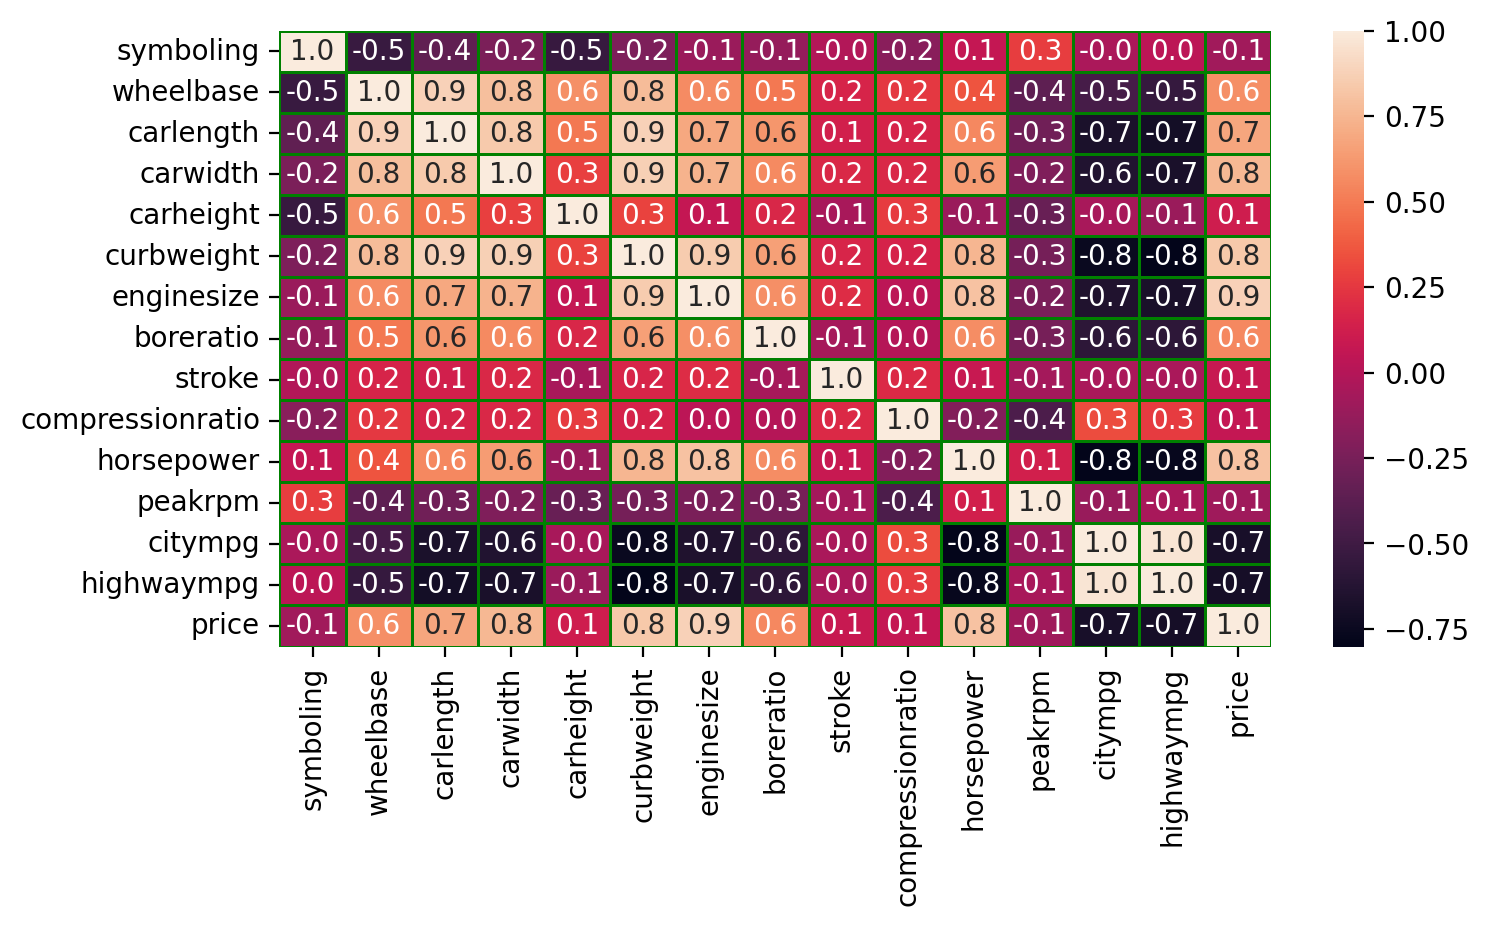

In [8]:
plt.figure(figsize=(8, 4), dpi=200)
sns.heatmap(df.corr(), annot=True, linewidths=1, linecolor="green", fmt=".1f")

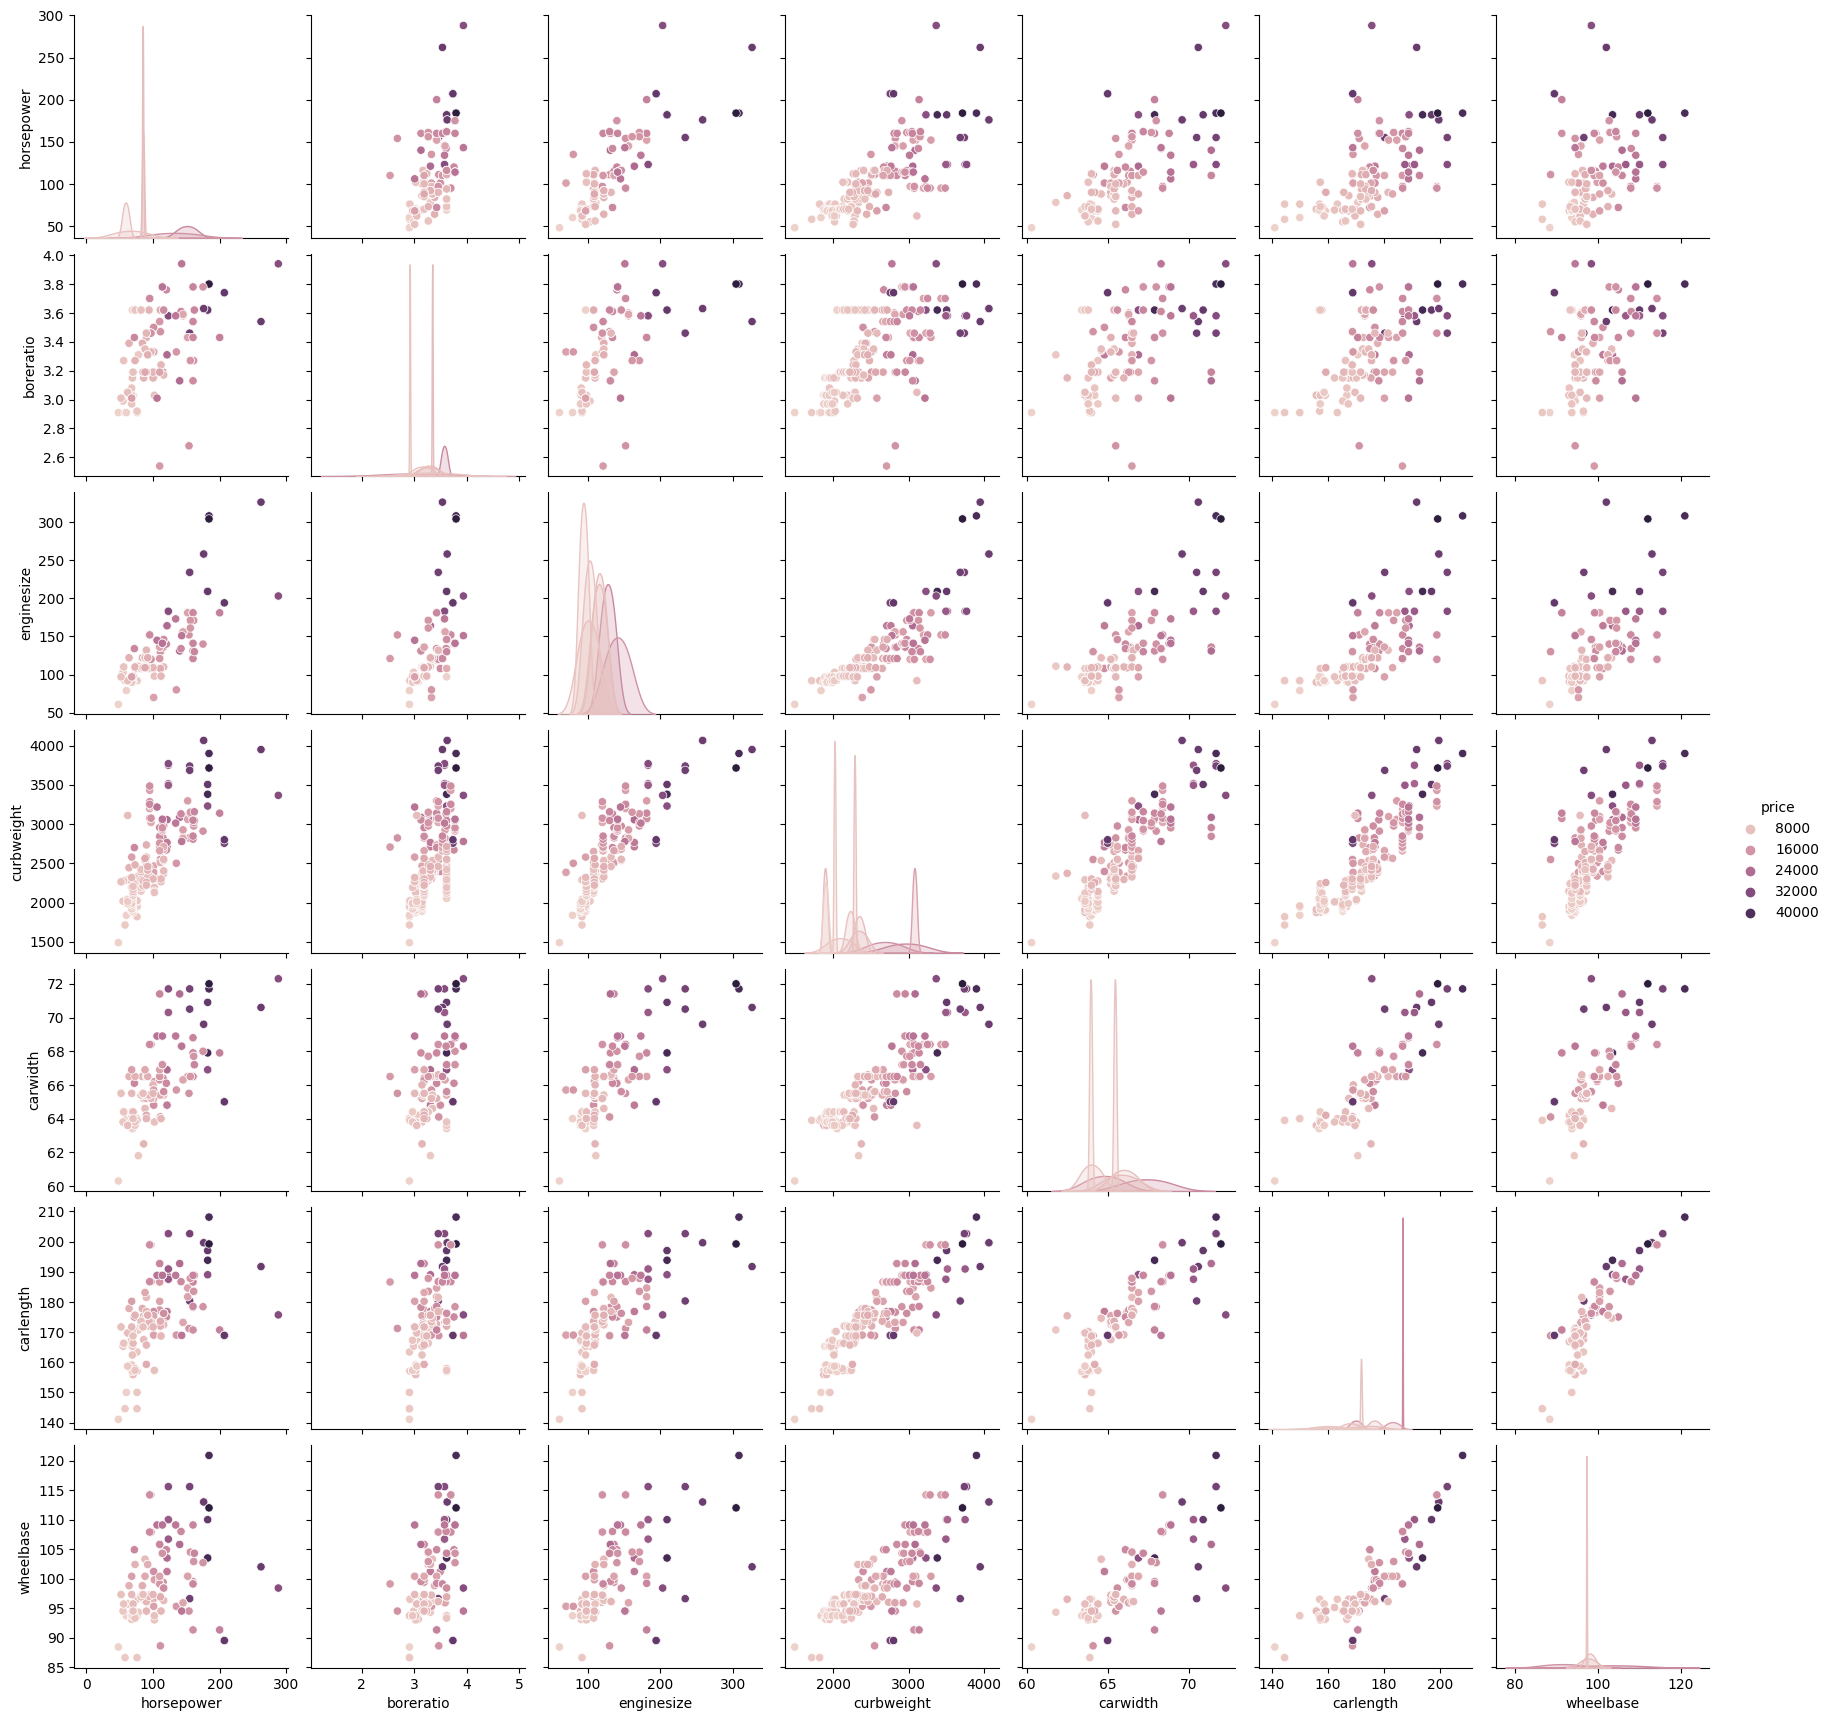

In [9]:
sns.pairplot(data=df, hue="price",
              vars=["horsepower", "boreratio", "enginesize", "curbweight", "carwidth", "carlength", "wheelbase"])

In [10]:
str_cols = ["CarName", "fueltype", "aspiration", "doornumber", "carbody", "drivewheel", "enginelocation", "enginetype", "cylindernumber", "fuelsystem"]

In [11]:
df[str_cols].nunique(axis=0)

CarName           147
fueltype            2
aspiration          2
doornumber          2
carbody             5
drivewheel          3
enginelocation      2
enginetype          7
cylindernumber      7
fuelsystem          8
dtype: int64

In [12]:
df_str = pd.get_dummies(df[str_cols])
df_num = df.drop(str_cols, axis=1) 

In [13]:
df_one_hot_encoded = pd.concat([df_num, df_str], axis=1)

In [21]:
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV

In [22]:
X = df_one_hot_encoded.drop("price", axis=1)
y = df_one_hot_encoded["price"]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [24]:
elastic_model = ElasticNet()

In [60]:
param_grid = {"alpha": [0.1, 1, 5, 10, 100],
              "l1_ratio": [.1, .5, .7, .95, .99, 1]}


In [61]:
grid_model = GridSearchCV(estimator=elastic_model,
                         param_grid=param_grid,
                         scoring="neg_mean_squared_error",
                         cv=10, verbose=1)

In [62]:
grid_model.fit(scaled_X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


c:\Users\MMucahitNAS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.205e+06, tolerance: 9.368e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\MMucahitNAS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.839e+06, tolerance: 8.720e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\MMucahitNAS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [63]:
grid_model.best_estimator_

ElasticNet(alpha=100, l1_ratio=1)

In [64]:
grid_model.best_params_

{'alpha': 100, 'l1_ratio': 1}

In [66]:
y_pred = grid_model.predict(scaled_X_test)

In [67]:
np.sqrt(mean_squared_error(y_test, y_pred))

3948.4737542148596